<div style="text-align:center"><h1><font color=#99qt99> CASE STUDY </font> </h1></div>
<div style="text-align:center"><h1><font color=#qt99qt> Credit Segmentation</font> </h1></div>
<hr  style='height:5px'>

> - We Check that Customers have:
    - taken cash in advance per month
    - Credit score good or Bad
    - Purchases (more or less)
    - Ratio b/w Paymen to Minimum Payment
    - Either do installment Payment for that item
    - Or do One-Off Payment for that item


In [1]:
# IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
# IMPORT FILE with LOCATION
address = 'CC_GENERAL.csv'

In [3]:
# READ & SHOW FILE
credit = pd.read_csv(address)
credit.sample(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
1582,C11635,1229.397644,1.000000,11414.48,6754.38,4660.10,0.000000,1.000000,0.916667,1.000000,0.000000,0,176,9000.0,9686.614183,263.250811,0.916667,12
900,C10931,1917.203534,1.000000,0.00,0.00,0.00,84.438672,0.000000,0.000000,0.000000,0.083333,1,0,2000.0,468.617347,899.048237,0.000000,12
5170,C15315,943.584041,0.875000,103.00,103.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1000.0,215.325023,410.484825,0.000000,8
1228,C11272,1.019189,0.090909,87.02,0.00,87.02,0.000000,0.083333,0.000000,0.083333,0.000000,0,1,15500.0,0.000000,NaN,0.000000,12
204,C10212,4559.779234,1.000000,10848.50,8208.00,2640.50,0.000000,1.000000,0.666667,1.000000,0.000000,0,123,7500.0,9423.715495,2925.275522,0.000000,12


In [4]:
# DROP EXTRA COLUMN
credit = credit.drop('CUST_ID', axis=1)
credit.sample(5)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
1358,187.212600,1.000000,1807.08,967.08,840.00,0.000000,1.000000,0.416667,0.916667,0.00,0,19,10000.0,1681.194004,175.755159,1.0,12
4930,56.945201,0.454545,328.10,328.10,0.00,0.000000,0.166667,0.166667,0.000000,0.00,0,4,6500.0,437.845434,117.947254,0.0,12
4119,3803.111606,1.000000,2025.96,541.39,1484.57,0.000000,1.000000,0.333333,0.833333,0.00,0,51,5600.0,1354.420552,990.395353,0.0,12
5789,6223.173969,1.000000,0.00,0.00,0.00,3607.876623,0.000000,0.000000,0.000000,0.25,5,0,7500.0,1373.795303,1450.180855,0.0,12
4486,1248.903628,1.000000,518.31,113.31,405.00,472.118676,1.000000,0.333333,1.000000,0.25,5,29,1200.0,1141.190295,980.845115,0.0,12


In [5]:
# Look at COLUMNS DATA TYPES as well as measure NULL VALUES
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS                    8637 non-null float64
PRC_FULL_PAYMENT           

In [7]:
# We have 2 Columns having null Values
# 1st one 'CREDIT_LIMIT'
print(credit['CREDIT_LIMIT'].notnull().value_counts())
# 2nd One 'MINIMUM_PAYMENTS'
print('\n')
print(credit['MINIMUM_PAYMENTS'].notnull().value_counts())

True     8949
False       1
Name: CREDIT_LIMIT, dtype: int64


True     8637
False     313
Name: MINIMUM_PAYMENTS, dtype: int64


In [8]:
credit.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [9]:
import pandas_profiling

In [10]:
pandas_profiling.ProfileReport(credit)

In [11]:
credit[credit['CREDIT_LIMIT'].isnull()]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5203,18.400472,0.166667,0.0,0.0,0.0,186.853063,0.0,0.0,0.0,0.166667,1,0,NaN,9.040017,14.418723,0.0,6


In [14]:
credit.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [19]:
# Seprate Numerical & categorical Variables
num = [key for key in dict(credit.dtypes) 
                       if dict(credit.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']
                  ]

cat = [key for key in dict(credit.dtypes) 
                   if dict(credit.dtypes)[key] in ['object']
              ]
print('Numerical: ',num,'\n\n','Categorical:', cat)

Numerical:  ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'] 

 Categorical: []


###  <font color=#qt99qt>Missing Values Treatment</font>
    - treat using median

In [20]:
def missing(x):
    x = x.fillna(x.median())
    return x

credit[['CREDIT_LIMIT', 'MINIMUM_PAYMENTS']] = credit[['CREDIT_LIMIT', 'MINIMUM_PAYMENTS']].apply(lambda x: missing(x))

In [22]:
credit[['CREDIT_LIMIT', 'MINIMUM_PAYMENTS']].head()

,CREDIT_LIMIT,MINIMUM_PAYMENTS
0,1000.0,139.509787
1,7000.0,1072.340217
2,7500.0,627.284787
3,7500.0,312.343947
4,1200.0,244.791237


In [23]:
credit.isnull().any()

BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                        False
PAYMENTS                            False
MINIMUM_PAYMENTS                    False
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

## <font color=#qt99qt>Deriving $“intelligent”$ KPIs</font>

In [25]:
# Monthly average purchase and cash advance amount
credit['Monthly_avg_purchase'] = credit['PURCHASES']/credit['TENURE']
credit['Cash_adv_amount'] = credit['CASH_ADVANCE']/credit['TENURE']
credit[['Monthly_avg_purchase', 'Cash_adv_amount', 'TENURE', 'PURCHASES']].head()

,Monthly_avg_purchase,Cash_adv_amount,TENURE,PURCHASES
0,7.950000,0.000000,12,95.40
1,0.000000,536.912124,12,0.00
2,64.430833,0.000000,12,773.17
3,124.916667,17.149001,12,1499.00
4,1.333333,0.000000,12,16.00


### <font color=#qt99qt>Purchase Type</font>
    - one_off
    - installments

In [26]:
# Purchases by type (one-off, installments):

def purchase_type(credit):   
    if (credit['ONEOFF_PURCHASES']==0) & (credit['INSTALLMENTS_PURCHASES']==0):
        return 'None'
    if (credit['ONEOFF_PURCHASES']>0) & (credit['INSTALLMENTS_PURCHASES']>0):
         return 'Both_Oneoff_Installment'
    if (credit['ONEOFF_PURCHASES']>0) & (credit['INSTALLMENTS_PURCHASES']==0):
        return 'One_Off'
    if (credit['ONEOFF_PURCHASES']==0) & (credit['INSTALLMENTS_PURCHASES']>0):
        return 'Istallment'    


In [27]:
credit['Purchase_Type']=credit[['ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES']].apply(lambda x : purchase_type(x), axis=1)
credit['Purchase_Type'].value_counts()

Both_Oneoff_Installment    2774
Istallment                 2260
None                       2042
One_Off                    1874
Name: Purchase_Type, dtype: int64

In [31]:
# Average amount per purchase and cash advance transaction:
credit['Avg_purchase'] = credit['PURCHASES']/credit['PURCHASES_TRX']
credit['Cash_adv_Trans'] = credit['CASH_ADVANCE']/credit['CASH_ADVANCE_TRX']
# credit[['Avg_purchase','Cash_adv_Trans']].fillna(credit[['Avg_purchase','Cash_adv_Trans']].median())
credit[['Avg_purchase','Cash_adv_Trans']].head()

,Avg_purchase,Cash_adv_Trans
0,47.700000,NaN
1,NaN,1610.736371
2,64.430833,NaN
3,1499.000000,205.788017
4,16.000000,NaN


In [32]:
credit['Avg_purchase'].fillna(credit['Avg_purchase'].median(), inplace=True)
credit['Cash_adv_Trans'].fillna(credit['Cash_adv_Trans'].median(), inplace=True)
credit[['Avg_purchase','Cash_adv_Trans']].head()

,Avg_purchase,Cash_adv_Trans
0,47.700000,257.227887
1,55.458333,1610.736371
2,64.430833,257.227887
3,1499.000000,205.788017
4,16.000000,257.227887


In [34]:
# Limit usage (balance to credit limit ratio)
credit['Limit_use'] = credit['BALANCE']/credit['CREDIT_LIMIT']
# Payments to minimum payments ratio
credit['Minimum_pay'] = credit['PAYMENTS']/credit['MINIMUM_PAYMENTS']

credit[['Limit_use','Minimum_pay']].head()

,Limit_use,Minimum_pay
0,0.040901,1.446508
1,0.457495,3.826241
2,0.332687,0.991682
3,0.222223,0.000000
4,0.681429,2.771075


In [35]:
features = credit.columns.difference(['Purchase_Type'])
credit_log = credit[features].applymap(lambda x: np.log(x+1))
credit_log.head()

,Avg_purchase,BALANCE,BALANCE_FREQUENCY,CASH_ADVANCE,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,CREDIT_LIMIT,Cash_adv_Trans,Cash_adv_amount,INSTALLMENTS_PURCHASES,...,Monthly_avg_purchase,ONEOFF_PURCHASES,ONEOFF_PURCHASES_FREQUENCY,PAYMENTS,PRC_FULL_PAYMENT,PURCHASES,PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,PURCHASES_TRX,TENURE
0,3.885679,3.735304,0.597837,0.000000,0.000000,0.000000,6.908755,5.553842,0.000000,4.568506,...,2.191654,0.000000,0.000000,5.312231,0.000000,4.568506,0.154151,0.080042,1.098612,2.564949
1,4.033503,8.071989,0.646627,8.770896,0.223144,1.609438,8.853808,7.385067,6.287695,0.000000,...,0.000000,0.000000,0.000000,8.319725,0.200671,0.000000,0.000000,0.000000,0.000000,2.564949
2,4.180994,7.822504,0.693147,0.000000,0.000000,0.000000,8.922792,5.553842,0.000000,0.000000,...,4.180994,6.651791,0.693147,6.434654,0.000000,6.651791,0.693147,0.000000,2.564949,2.564949
3,7.313220,7.419183,0.492477,5.331694,0.080042,0.693147,8.922792,5.331694,2.898616,0.000000,...,4.835620,7.313220,0.080042,0.000000,0.000000,7.313220,0.080042,0.000000,0.693147,2.564949
4,2.833213,6.707735,0.693147,0.000000,0.000000,0.000000,7.090910,5.553842,0.000000,0.000000,...,0.847298,2.833213,0.080042,6.521114,0.000000,2.833213,0.080042,0.000000,0.693147,2.564949


In [40]:
features = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX','CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT','TENURE', 'Monthly_avg_purchase', 'Cash_adv_amount', 'Minimum_pay']
credit_log = credit_log[features]
print(credit_log.columns)
credit_log.head()

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'Monthly_avg_purchase', 'Cash_adv_amount', 'Minimum_pay'],
      dtype='object')


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Cash_adv_amount,Minimum_pay
0,3.735304,0.597837,4.568506,0.000000,4.568506,0.000000,0.154151,0.000000,0.080042,0.000000,0.000000,1.098612,6.908755,5.312231,4.945277,0.000000,2.564949,2.191654,0.000000,0.894662
1,8.071989,0.646627,0.000000,0.000000,0.000000,8.770896,0.000000,0.000000,0.000000,0.223144,1.609438,0.000000,8.853808,8.319725,6.978531,0.200671,2.564949,0.000000,6.287695,1.574068
2,7.822504,0.693147,6.651791,6.651791,0.000000,0.000000,0.693147,0.693147,0.000000,0.000000,0.000000,2.564949,8.922792,6.434654,6.442994,0.000000,2.564949,4.180994,0.000000,0.688979
3,7.419183,0.492477,7.313220,7.313220,0.000000,5.331694,0.080042,0.080042,0.000000,0.080042,0.693147,0.693147,8.922792,0.000000,5.747301,0.000000,2.564949,4.835620,2.898616,0.000000
4,6.707735,0.693147,2.833213,2.833213,0.000000,0.000000,0.080042,0.080042,0.000000,0.000000,0.000000,0.693147,7.090910,6.521114,5.504483,0.000000,2.564949,0.847298,0.000000,1.327360


In [41]:
column=['BALANCE','PURCHASES','CASH_ADVANCE','TENURE','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','CREDIT_LIMIT']
credit_pre = credit_log[[x for x in credit_log.columns if x not in column ]]
credit_pre.head()

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,Monthly_avg_purchase,Cash_adv_amount,Minimum_pay
0,0.597837,0.000000,4.568506,0.154151,0.000000,0.080042,0.000000,0.000000,1.098612,2.191654,0.000000,0.894662
1,0.646627,0.000000,0.000000,0.000000,0.000000,0.000000,0.223144,1.609438,0.000000,0.000000,6.287695,1.574068
2,0.693147,6.651791,0.000000,0.693147,0.693147,0.000000,0.000000,0.000000,2.564949,4.180994,0.000000,0.688979
3,0.492477,7.313220,0.000000,0.080042,0.080042,0.000000,0.080042,0.693147,0.693147,4.835620,2.898616,0.000000
4,0.693147,2.833213,0.000000,0.080042,0.080042,0.000000,0.000000,0.000000,0.693147,0.847298,0.000000,1.327360


In [42]:
print('Credit_pre: ',len(credit_pre.columns), '\n',credit_pre.columns,'\n\n', 'Credit_log: ',len(credit_log.columns),'\n', credit_log.columns)

Credit_pre:  12 
 Index(['BALANCE_FREQUENCY', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'Monthly_avg_purchase',
       'Cash_adv_amount', 'Minimum_pay'],
      dtype='object') 

 Credit_log:  20 
 Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'Monthly_avg_purchase', 'Cash_adv_amount', 'Minimum_pay'],
      dtype='object')


In [45]:
# Advanced reporting
cat_report = credit.groupby('Purchase_Type').apply(lambda x : np.mean(x['Minimum_pay']))
print(cat_report.index, '\n', cat_report.values)
cat_report

Index(['Both_Oneoff_Installment', 'Istallment', 'None', 'One_Off'], dtype='object', name='Purchase_Type') 
 [ 7.23698216 13.2590037  10.08745106  5.57108156]


Purchase_Type
Both_Oneoff_Installment     7.236982
Istallment                 13.259004
None                       10.087451
One_Off                     5.571082
dtype: float64

In [44]:
credit['Purchase_Type'].value_counts()

Both_Oneoff_Installment    2774
Istallment                 2260
None                       2042
One_Off                    1874
Name: Purchase_Type, dtype: int64

Text(0.5, 1.0, 'Mean payment_minpayment ratio for each purchse type')

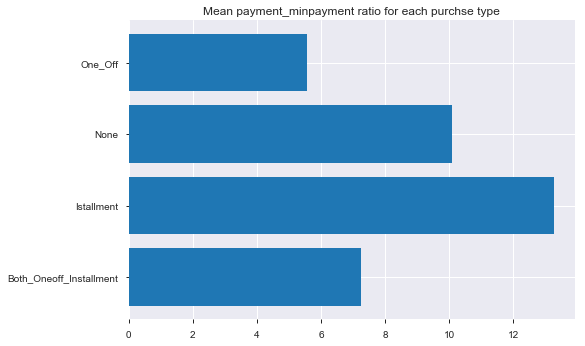

In [46]:
# plt.barh(left=np.arange(len(x)),bottom=x.values)
fig,ax=plt.subplots()
ax.barh(y=range(len(cat_report)) ,width=cat_report.values)
ax.set(yticks= np.arange(len(cat_report)),yticklabels=cat_report.index);
plt.title('Mean payment_minpayment ratio for each purchse type')

In [55]:
credit['Purchase_Type'].dtype

dtype('O')

In [56]:
# Dummies Creation
dummies = pd.get_dummies(credit['Purchase_Type'])
dummies.head()

,Both_Oneoff_Installment,Istallment,None,One_Off
0,0,1,0,0
1,0,0,1,0
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [57]:
credit_data = pd.concat([credit, dummies], axis=1)
credit_data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,Cash_adv_amount,Purchase_Type,Avg_purchase,Cash_adv_Trans,Limit_use,Minimum_pay,Both_Oneoff_Installment,Istallment,None,One_Off
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,...,0.000000,Istallment,47.700000,257.227887,0.040901,1.446508,0,1,0,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,...,536.912124,None,55.458333,1610.736371,0.457495,3.826241,0,0,1,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,One_Off,64.430833,257.227887,0.332687,0.991682,0,0,0,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,...,17.149001,One_Off,1499.000000,205.788017,0.222223,0.000000,0,0,0,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,...,0.000000,One_Off,16.000000,257.227887,0.681429,2.771075,0,0,0,1


In [58]:
credit_pre = round(credit_pre,2)
credit_pre.head()

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,Monthly_avg_purchase,Cash_adv_amount,Minimum_pay
0,0.60,0.00,4.57,0.15,0.00,0.08,0.00,0.00,1.10,2.19,0.00,0.89
1,0.65,0.00,0.00,0.00,0.00,0.00,0.22,1.61,0.00,0.00,6.29,1.57
2,0.69,6.65,0.00,0.69,0.69,0.00,0.00,0.00,2.56,4.18,0.00,0.69
3,0.49,7.31,0.00,0.08,0.08,0.00,0.08,0.69,0.69,4.84,2.90,0.00
4,0.69,2.83,0.00,0.08,0.08,0.00,0.00,0.00,0.69,0.85,0.00,1.33


In [59]:
credit_dummies = pd.concat([credit_pre, dummies], axis=1)
credit_dummies.head()

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,Monthly_avg_purchase,Cash_adv_amount,Minimum_pay,Both_Oneoff_Installment,Istallment,None,One_Off
0,0.60,0.00,4.57,0.15,0.00,0.08,0.00,0.00,1.10,2.19,0.00,0.89,0,1,0,0
1,0.65,0.00,0.00,0.00,0.00,0.00,0.22,1.61,0.00,0.00,6.29,1.57,0,0,1,0
2,0.69,6.65,0.00,0.69,0.69,0.00,0.00,0.00,2.56,4.18,0.00,0.69,0,0,0,1
3,0.49,7.31,0.00,0.08,0.08,0.00,0.08,0.69,0.69,4.84,2.90,0.00,0,0,0,1
4,0.69,2.83,0.00,0.08,0.08,0.00,0.00,0.00,0.69,0.85,0.00,1.33,0,0,0,1


In [60]:
credit_dummies.corr()

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,Monthly_avg_purchase,Cash_adv_amount,Minimum_pay,Both_Oneoff_Installment,Istallment,None,One_Off
BALANCE_FREQUENCY,1.000000,0.139961,0.110417,0.211174,0.198590,0.161881,0.194481,0.191168,0.197202,0.136664,0.153518,-0.151489,0.191081,-0.134374,0.011476,-0.085545
ONEOFF_PURCHASES,0.139961,1.000000,0.161418,0.394152,0.813567,0.097062,-0.128369,-0.144800,0.574456,0.712307,-0.182491,0.236776,0.661115,-0.573711,-0.536666,0.414663
INSTALLMENTS_PURCHASES,0.110417,0.161418,1.000000,0.804550,0.191375,0.905655,-0.309079,-0.335578,0.782697,0.687560,-0.377482,0.185748,0.607266,0.448753,-0.591237,-0.559629
PURCHASES_FREQUENCY,0.211174,0.394152,0.804550,1.000000,0.503161,0.856668,-0.344690,-0.382511,0.921677,0.817448,-0.433556,0.196274,0.522032,0.310228,-0.708530,-0.193855
ONEOFF_PURCHASES_FREQUENCY,0.198590,0.813567,0.191375,0.503161,1.000000,0.143313,-0.122662,-0.145778,0.621676,0.624299,-0.178068,0.259299,0.555966,-0.425343,-0.397878,0.232609
PURCHASES_INSTALLMENTS_FREQUENCY,0.161881,0.097062,0.905655,0.856668,0.143313,1.000000,-0.289923,-0.315246,0.769562,0.614007,-0.354275,0.141509,0.486827,0.446907,-0.520897,-0.493309
CASH_ADVANCE_FREQUENCY,0.194481,-0.128369,-0.309079,-0.344690,-0.122662,-0.289923,1.000000,0.935342,-0.326284,-0.340125,0.825049,-0.130469,-0.103656,-0.252262,0.402534,-0.027985
CASH_ADVANCE_TRX,0.191168,-0.144800,-0.335578,-0.382511,-0.145778,-0.315246,0.935342,1.000000,-0.357787,-0.377971,0.902761,-0.146683,-0.109572,-0.279474,0.447999,-0.039097
PURCHASES_TRX,0.197202,0.574456,0.782697,0.921677,0.621676,0.769562,-0.326284,-0.357787,1.000000,0.899867,-0.414140,0.237145,0.620719,0.161846,-0.749450,-0.105383
Monthly_avg_purchase,0.136664,0.712307,0.687560,0.817448,0.624299,0.614007,-0.340125,-0.377971,0.899867,1.000000,-0.426944,0.290631,0.573871,0.089256,-0.828239,0.106643


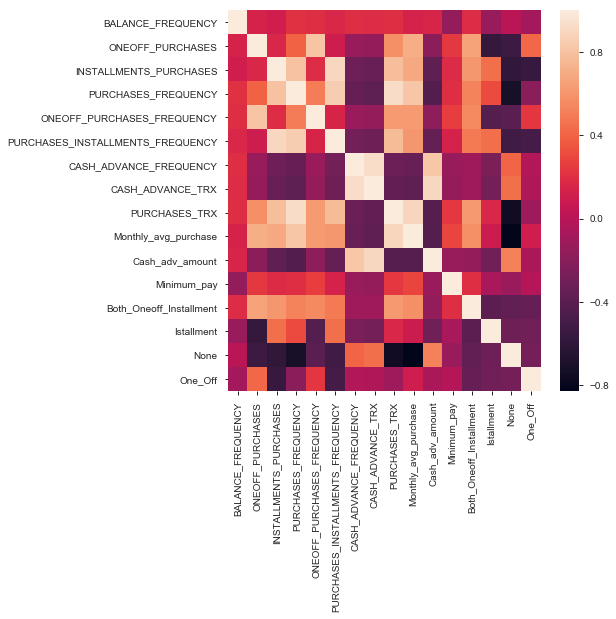

In [71]:
plt.figure(figsize=(7,7))
sns.heatmap(credit_dummies.corr())

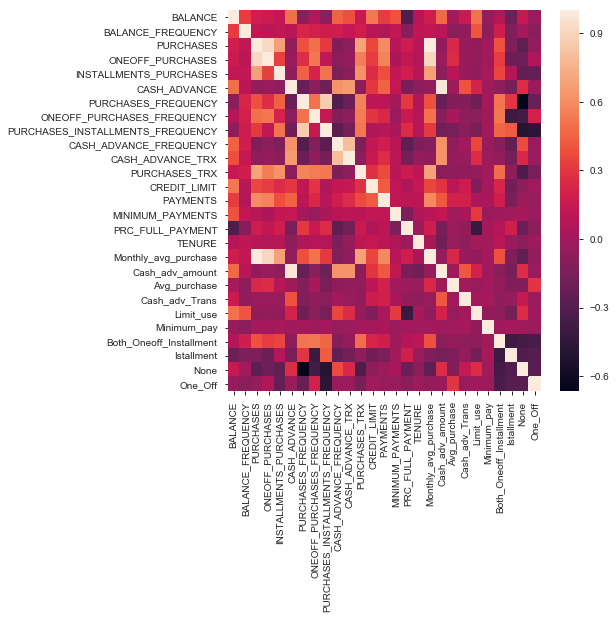

In [72]:
plt.figure(figsize=(7,7))
sns.heatmap(credit_data.corr())

### <font color=#qt99qt>Now put data in the same scale <font color=#555951>$OR$</font> Scaling the Data</font>

In [73]:
from sklearn.preprocessing import StandardScaler

In [75]:
sc = StandardScaler()
credit_scaled = sc.fit_transform(credit_dummies)
# credit_scaled

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [76]:
credit_scaled

array([[-0.12334646, -0.98708003,  0.39497326, ...,  1.72051649,
        -0.54369045, -0.514625  ],
       [ 0.21601745, -0.98708003, -1.08745089, ..., -0.58122082,
         1.83928189, -0.514625  ],
       [ 0.48750858,  1.06150189, -1.08745089, ..., -0.58122082,
        -0.54369045,  1.94316249],
       ...,
       [-0.05547368, -0.98708003,  0.52796974, ...,  1.72051649,
        -0.54369045, -0.514625  ],
       [-0.05547368, -0.98708003, -1.08745089, ..., -0.58122082,
         1.83928189, -0.514625  ],
       [-0.73420149,  1.16932199, -1.08745089, ..., -0.58122082,
        -0.54369045,  1.94316249]])

In [77]:
credit_scaled.shape

(8950, 16)

## <font color=#qt99qt>Applying <font color=#dd9487>$PCA$</font></font>

In [78]:
from sklearn.decomposition import PCA

In [79]:
# lets check how many columns we need for the transforming the Data
# Let we take all columns at initial stage/step
pc = PCA(n_components=16)
credit_pca = pc.fit(credit_scaled)

In [80]:
sum(credit_pca.explained_variance_ratio_)

0.9999999999999999

In [81]:
var_ratio = {}
for i in range(2,17):
    pc = PCA(n_components=i)
    credit_pca = pc.fit(credit_scaled)
    var_ratio[i] = sum(credit_pca.explained_variance_ratio_)
var_ratio

{2: 0.6044006201437628,
 3: 0.7521528136873064,
 4: 0.8275460331388006,
 5: 0.891575776869921,
 6: 0.9358485404399437,
 7: 0.9586547552841944,
 8: 0.9717694018690324,
 9: 0.9822552090906468,
 10: 0.9889756879338704,
 11: 0.992246421012304,
 12: 0.9950852337831715,
 13: 0.9978349600052271,
 14: 0.999613217175194,
 15: 0.9999999999999999,
 16: 0.9999999999999999}

In [82]:
# At 6th step it covered 93% data, so we select 6 components for the further operation
pc = PCA(n_components=6)
credit_pca = pc.fit(credit_scaled)
print(credit_pca.explained_variance_)
print('SUM: ',sum(credit_pca.explained_variance_))

[6.7098713  2.96161924 2.36429926 1.20642631 1.02459038 0.70844337]
SUM:  14.975249859313882


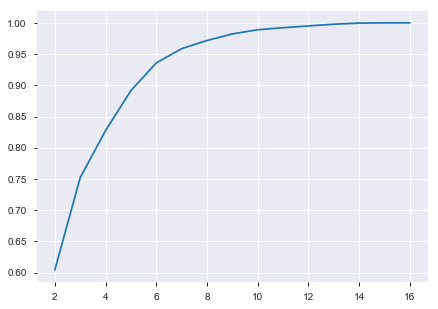

In [83]:
# Plot this data in graph to show setps 
plt.figure(figsize=(7,5))
pd.Series(var_ratio).plot()

In [84]:
# Now scaling ths Data on these 6 n_components
pca = PCA(n_components=6)
pc_final = pc.fit(credit_scaled)
reduce_credit = pc_final.fit_transform(credit_scaled)
reduce_credit.shape

(8950, 6)

In [91]:
print('Original Data: ',credit_data.shape,'\n\n', 'Credit Dummie: ',credit_dummies.shape, '\n\n Credit Scaled',credit_scaled.shape )

Original Data:  (8950, 28) 

 Credit Dummie:  (8950, 16) 

 Credit Scaled (8950, 16)


In [87]:
# to see the eigenvector use '.compenents_' keyword : All the weightd of calculating PC
col_list = credit_dummies.columns
eigenvector = pd.DataFrame(pc_final.components_.T, columns = ['pc_' + str(i) for i in range(6)], index = col_list)
eigenvector

,pc_0,pc_1,pc_2,pc_3,pc_4,pc_5
BALANCE_FREQUENCY,0.044577,0.165498,0.269263,-0.261678,-0.544417,-0.673779
ONEOFF_PURCHASES,0.221478,0.440943,-0.156393,0.015336,-0.016037,0.128716
INSTALLMENTS_PURCHASES,0.317011,-0.169478,0.283550,0.067057,0.047441,0.112029
PURCHASES_FREQUENCY,0.351927,-0.031665,0.144038,-0.142260,0.030286,-0.078343
ONEOFF_PURCHASES_FREQUENCY,0.221590,0.384697,-0.085176,0.047650,-0.040373,-0.093976
PURCHASES_INSTALLMENTS_FREQUENCY,0.300518,-0.187123,0.290416,-0.012179,0.015013,0.007543
CASH_ADVANCE_FREQUENCY,-0.206631,0.246996,0.379422,-0.203772,0.246908,0.068575
CASH_ADVANCE_TRX,-0.221768,0.251237,0.386675,-0.180598,0.231527,0.083375
PURCHASES_TRX,0.363137,0.069140,0.103413,-0.109536,0.051037,-0.009201
Monthly_avg_purchase,0.352414,0.128700,-0.015673,-0.162678,0.137374,0.011927


In [88]:
# To see Eigenvalue use '.explained_variance_ratio_': How many variance captured by PCA in each attempt
scaled_data = pd.Series(pc_final.explained_variance_ratio_, index = ['PC_' + str(i) for i in range(6)])
scaled_data

PC_0    0.419320
PC_1    0.185081
PC_2    0.147752
PC_3    0.075393
PC_4    0.064030
PC_5    0.044273
dtype: float64

In [89]:
from sklearn.cluster import KMeans

In [130]:
km_6 = KMeans(n_clusters=6, random_state = 0)
print(km_6.fit(reduce_credit))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)


In [131]:
km_6.labels_

array([1, 2, 3, ..., 1, 2, 4])

In [132]:
label_data = pd.Series(km_6.labels_).value_counts()
print(label_data)

1    2181
2    2068
5    1975
3    1219
0     845
4     662
dtype: int64


## <font color=#qt99qt>Cluster_Error</font>

In [133]:
cluster_range = range(1,21)
cluster_error = []
for i in cluster_range:
    clusters = KMeans(i).fit(reduce_credit)
    cluster_error.append(clusters.inertia_)

cluster_df = pd.DataFrame({'Cluster_Number': cluster_range, 'Cluster_Error':cluster_error})
cluster_df

,Cluster_Number,Cluster_Error
0,1,134013.510991
1,2,88389.314584
2,3,65835.434284
3,4,44616.476369
4,5,38303.865444
5,6,33889.785968
6,7,30574.838476
7,8,27925.311791
8,9,25693.151229
9,10,23619.634010


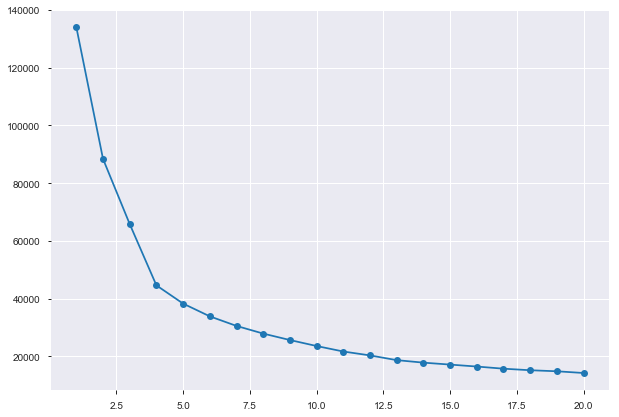

In [135]:
%matplotlib inline
plt.figure(figsize=(10,7))
plt.plot(cluster_df.Cluster_Number, cluster_df.Cluster_Error, marker = 'o')

## <font color=#qt99qt>Silhouette Diagram to find clusters</font>

In [136]:
from sklearn import metrics

In [137]:
K_range = range(2,7)
score = []
for i in K_range:
    km = KMeans(n_clusters=i, random_state=0).fit(reduce_credit)
    score.append(metrics.silhouette_score(reduce_credit, km.labels_))

In [138]:
score

[0.33451942796285733,
 0.3700027923308376,
 0.45970003821502853,
 0.4518065701244604,
 0.44294936889656955]

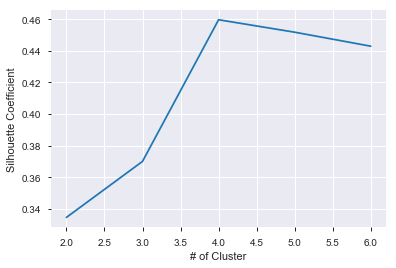

In [139]:
# plot
plt.plot(K_range, score)
plt.xlabel('# of Cluster')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

#### <font color=#deqt11>At this step we'll get the</font> <font color=#99qt99>n_components: </font> <font color=#695def>This means there are only 4 (four) types behaviours of all the customers</font>

In [141]:
km_4 = KMeans(n_clusters=4, random_state = 0)
print(km_4.fit(reduce_credit))
label_data = pd.Series(km_4.labels_).value_counts()
print('\n\n',label_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)


 0    2769
1    2231
2    2079
3    1871
dtype: int64


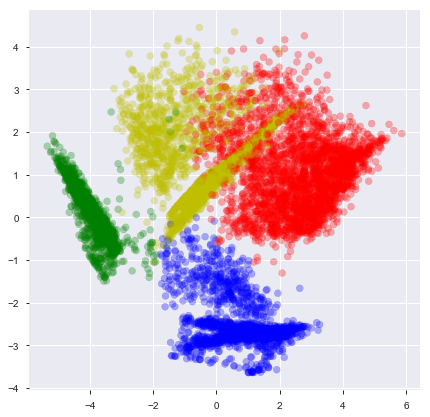

In [142]:
color_map = {0:'r', 1:'b', 2:'g', 3:'y'}
label_color = [color_map[i] for i in km_4.labels_]
plt.figure(figsize = (7,7))
plt.scatter(reduce_credit[:,0], reduce_credit[:,1],  c= label_color, cmap = 'spectral', alpha = 0.3)

In [143]:
# Original Data
print(credit_data.shape)
credit_data.sample(5)

(8950, 28)


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,Cash_adv_amount,Purchase_Type,Avg_purchase,Cash_adv_Trans,Limit_use,Minimum_pay,Both_Oneoff_Installment,Istallment,None,One_Off
665,27.207110,0.818182,685.08,220.00,465.08,0.000000,0.583333,0.250000,0.500000,0.00,...,0.000000,Both_Oneoff_Installment,28.545000,257.227887,0.002093,11.916509,1,0,0,0
414,318.034340,1.000000,1277.58,0.00,1277.58,0.000000,1.000000,0.000000,1.000000,0.00,...,0.000000,Istallment,63.879000,257.227887,0.045433,3.188799,0,1,0,0
1632,30.525356,0.454545,384.95,384.95,0.00,0.000000,0.333333,0.333333,0.000000,0.00,...,0.000000,One_Off,96.237500,257.227887,0.002105,5.769258,0,0,0,1
1610,2763.049499,1.000000,1921.85,1715.55,206.30,0.000000,0.916667,0.500000,0.666667,0.00,...,0.000000,Both_Oneoff_Installment,96.092500,257.227887,0.905918,0.724431,1,0,0,0
4423,158.919439,1.000000,0.00,0.00,0.00,787.758817,0.000000,0.000000,0.000000,0.25,...,65.646568,None,55.458333,262.586272,0.036118,3.192613,0,0,1,0


In [145]:
col_kpi=['PURCHASES_TRX','Monthly_avg_purchase','Cash_adv_amount','Limit_use','CASH_ADVANCE_TRX',
         'Minimum_pay','Both_Oneoff_Installment','Istallment','One_Off','None','CREDIT_LIMIT']
try:
    cluster_df_4=pd.concat([credit_data[col_kpi],pd.Series(km_4.labels_,name='Cluster_4')],axis=1)
    cluster_df_4
except Exception as e:
    print(e)

In [146]:
# Average of all cluster Data
cluster_4 = cluster_df_4.groupby('Cluster_4').apply(lambda x : x[col_kpi].mean()).T
cluster_4

Cluster_4,0,1,2,3
PURCHASES_TRX,33.013723,12.032721,0.033670,7.120791
Monthly_avg_purchase,193.008043,47.518563,0.098176,69.807860
Cash_adv_amount,67.466910,33.842111,186.251477,78.470609
Limit_use,0.353591,0.266752,0.574749,0.380218
CASH_ADVANCE_TRX,2.804261,1.048409,6.507937,2.909139
Minimum_pay,7.245651,13.377983,9.976902,5.573518
Both_Oneoff_Installment,1.000000,0.000000,0.001924,0.000534
Istallment,0.000000,1.000000,0.013949,0.000000
One_Off,0.000000,0.000000,0.001924,0.999466
None,0.000000,0.000000,0.982203,0.000000


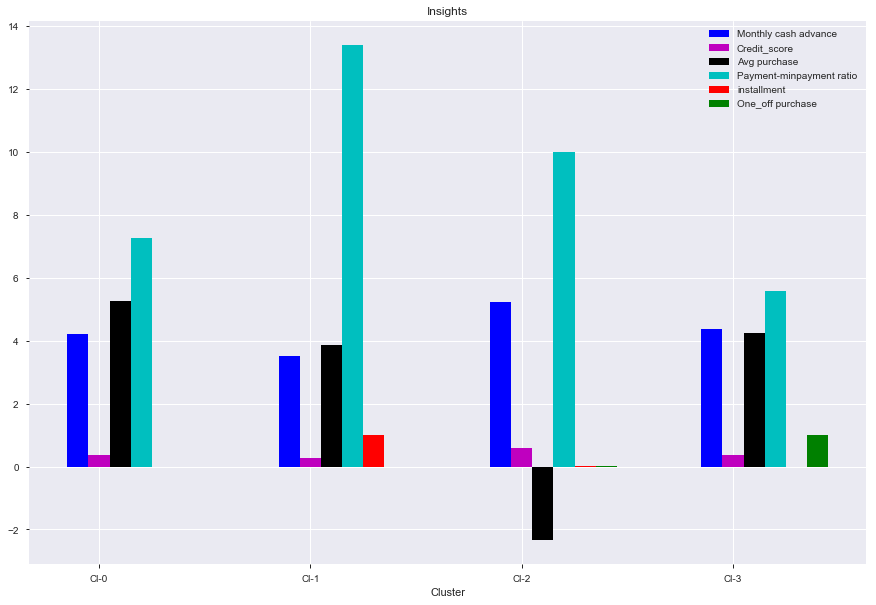

In [147]:
fig,ax=plt.subplots(figsize=(15,10))
index=np.arange(len(cluster_4.columns))

cash_advance=np.log(cluster_4.loc['Cash_adv_amount',:].values)
credit_score=(cluster_4.loc['Limit_use',:].values)
purchase= np.log(cluster_4.loc['Monthly_avg_purchase',:].values)
payment=cluster_4.loc['Minimum_pay',:].values
installment=cluster_4.loc['Istallment',:].values
one_off=cluster_4.loc['One_Off',:].values


bar_width=.10
b1=plt.bar(index,cash_advance,color='b',label='Monthly cash advance',width=bar_width)
b2=plt.bar(index+bar_width,credit_score,color='m',label='Credit_score',width=bar_width)
b3=plt.bar(index+2*bar_width,purchase,color='k',label='Avg purchase',width=bar_width)
b4=plt.bar(index+3*bar_width,payment,color='c',label='Payment-minpayment ratio',width=bar_width)
b5=plt.bar(index+4*bar_width,installment,color='r',label='installment',width=bar_width)
b6=plt.bar(index+5*bar_width,one_off,color='g',label='One_off purchase',width=bar_width)

plt.xlabel("Cluster")
plt.title("Insights")
plt.xticks(index + bar_width, ('Cl-0', 'Cl-1', 'Cl-2', 'Cl-3'))
plt.legend()

In [150]:
# Percentage of each cluster in the total customer base
# km_4.labels_
group_count=cluster_df_4.groupby('Cluster_4').apply(lambda x: x['Cluster_4'].value_counts())
percent=pd.Series((group_count.values.astype('float')/ cluster_df_4.shape[0])*100,name='Percentage')
pd.concat([pd.Series(group_count.values,name='Size'),percent],axis=1)


,Size,Percentage
0,2769,30.938547
1,2231,24.927374
2,2079,23.229050
3,1871,20.905028


# <font color=#abcabc>Conclusion by making Story</font>

## Cl-0: <font color=blue>Nearly <font color=red>30.9%</font>  of customers who have: </font>
> ***<font color=#efg999>Cl-0 Types of Customers Behaviours:</font>***
   - ***<font color=#911111>Cl-0:</font>***
    - take Cash in Advance per Month in good Ratio
    - maintain their CREDIT SCORE
    - Average purchase is higher comparing to all of them
    - Minimum Payments in good ratio
    - never did:
        - Instalment Purchase
        - One-Off Purchase

## Cl-1: <font color=blue>Nearly <font color=red>24.9%</font>  of customers who have: </font>
> ***<font color=#efg999>Cl-1 Types of Customers Behaviours:</font>***
   - ***<font color=#911111>Cl-1:</font>***
    - Cash in Advance per Month in good Ratio
    - maintain their CREDIT SCORE
    - Do Average purchase
    - Payment to Minimum Payment ratio is higher then all types of customers
    - do Installment payment, and they do higher comparing then all types of customers
    - never did One-Off payment

## Cl-2: <font color=blue>Nearly <font color=red>23.2%</font>  of customers who have: </font>
> ***<font color=#efg999>Cl-2 Types of Customers Behaviours:</font>***
   - ***<font color=#911111>Cl-2:</font>***
    - Higher Cash in Advance per Month then ohters
    - maintain their CREDIT SCORE
    - Do less Average purchase (Negative purchase)
    - Payment to Minimum Payment ratio is 2nd higher then all types of customers
    - do less installment payments 
    - also do less One-Off payments

## Cl-3: <font color=blue>Nearly <font color=red>20.9%</font>  of customers who have: </font>
> ***<font color=#efg999>Cl-3 Types of Customers Behaviours:</font>***
   - ***<font color=#911111>Cl-3:</font>***
    - Cash in Advance per Month then ohters
    - maintain their CREDIT SCORE
    - Do Average purchase
    - Payment to Minimum Payment ratio is good
    - never did Installment
    - Only these types of customers did One-Off payment, and they did higher One-Off Payment to all of them
